In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('/kaggle/input/carimage/car.jfif')
if img is None:
    print("Error: Image not found.")
    exit()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
igg = img_rgb.copy()

In [3]:
# Convert to grayscale and threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [4]:
# Remove noise with morphological opening
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure foreground with distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

In [5]:
# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Add 1 to avoid background as 0
markers[unknown == 255] = 0  # Mark unknown as 0

# Apply watershed
markers = cv2.watershed(img, markers)
img_rgb[markers == -1] = [255, 0, 0]  # Mark boundaries in red

(-0.5, 269.5, 147.5, -0.5)

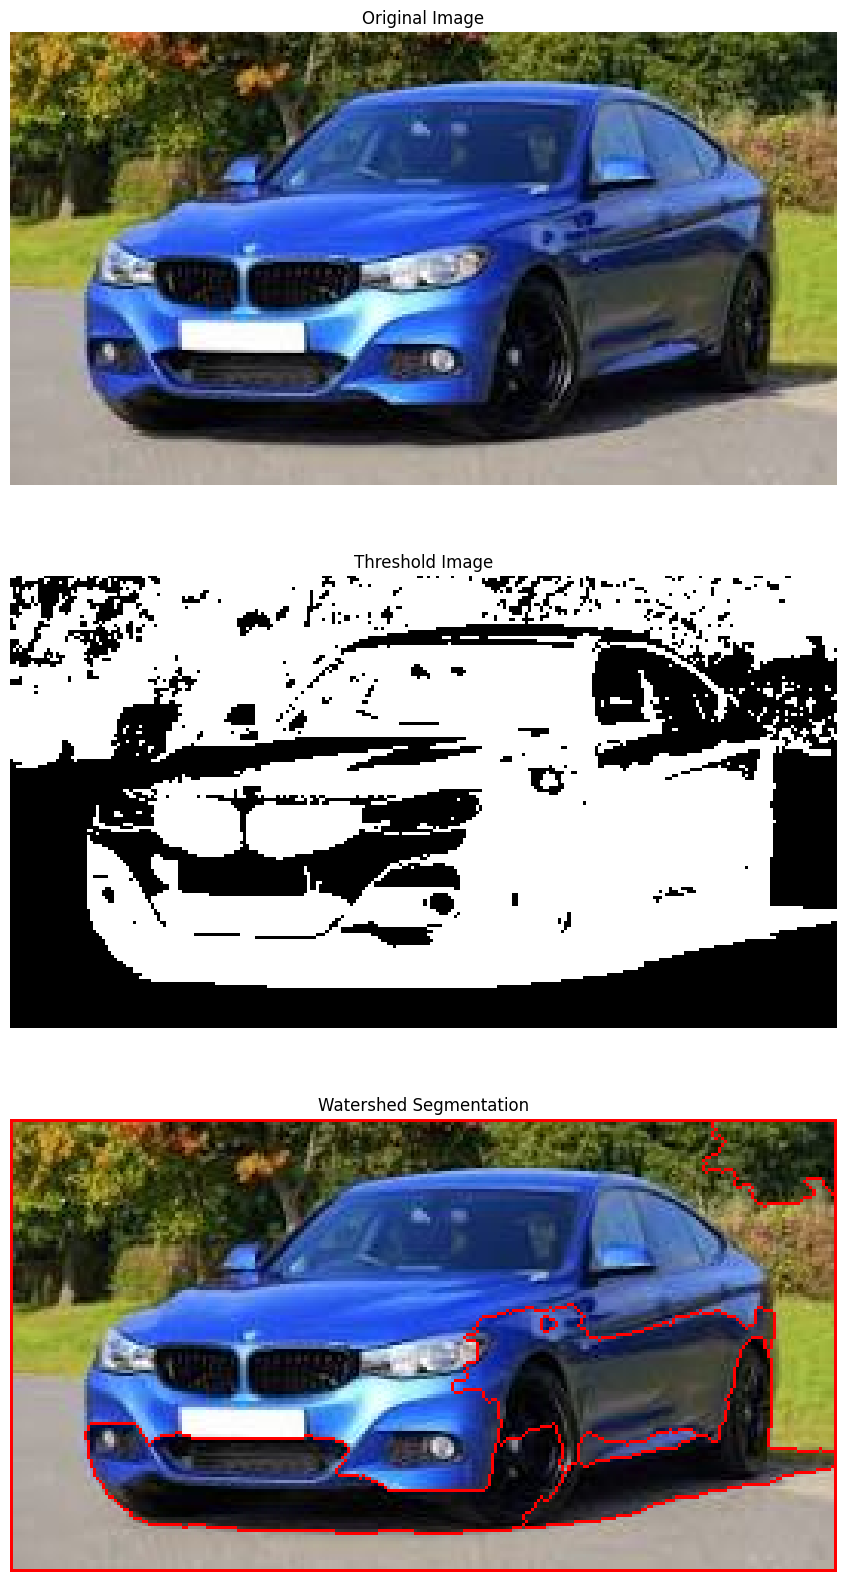

In [6]:
# Display results
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
plt.title('Original Image')
plt.imshow(igg)
plt.axis('off')

plt.subplot(3, 1, 2)
plt.title('Threshold Image')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.subplot(3,1, 3)
plt.title('Watershed Segmentation')
plt.imshow(img_rgb)
plt.axis('off')